# Sesión 5 - Implementación de algoritmos DQN y PG

> En la presente sesión, se va a desarrollar la **implementación** de los algoritmos básicos de aprendizaje por refuerzo: **Deep Q-networks (DQN)**, y **Policy Gradients (PG)**. El caso de uso desarrollado consistirá en el **Atary**, cuyo **entorno** es modelado por la librería de acceso público de **OpenAI gym**. Se hará uso de dos librería para la implementación de algoritmos de aprendizaje por refuerzo: **keras-rl** y **pytorch**. La primera, de más alto nivel, servirá para establecer un conocimiento práctico de los métodos DQN, y analizar los distintos hiperparámetros de entrenamiento. En el segundo caso, PG será implemetado con pytorch, librería de más bajo nivel, y la cuál permitirá trabajar en detalle la estrategia de aprendizaje on-policy y la optimización por gradiente de la policy.






---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.



---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda update --all
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```




---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [ ]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/VIU/08_AR_MIAR/sesiones_practicas/sesion_practica_1"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [ ]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Mounted at /content/gdrive

Colab: making sure  /content/gdrive/My Drive/VIU/08_AR_MIAR/sesiones_practicas/sesion_practica_1  exists.

Colab: Changing directory to  /content/gdrive/My Drive/VIU/08_AR_MIAR/sesiones_practicas/sesion_practica_1
/content/gdrive/My Drive/VIU/08_AR_MIAR/sesiones_practicas/sesion_practica_1
Archivos en el directorio: 
['dqn_BreakoutDeterministic-v4_weights_1750000.h5f.data-00000-of-00001', 'dqn_BreakoutDeterministic-v4_weights_1750000.h5f.index', 'images', 'dqn_CartPole-v0_weights.h5f.data-00000-of-00001', 'dqn_CartPole-v0_weights.h5f.index', '08MIAR_10_A_2022-23_sesion5_dqn_pg.ipynb', 'dqn_BreakoutDeterministic-v4_weights_250000.h5f.data-00000-of-00001', 'dqn_BreakoutDeterministic-v4_weights_250000.h5f.index', 'checkpoint', 'dqn_BreakoutDeterministic-v4_log.json', 'dqn_BreakoutDeterministic-v4_log_resume.json', '08MIAR_vanilla_pg.ipynb']


---
### 1.4. Instalar librerías necesarias


In [ ]:
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.8
else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.6 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654618 sha256=fc8dd139165420c740fc37e1d7f798217614eb4bcfc5030f2c56612e46ec2860
  Stored in directory: /root/.cache/pip/wheels/af/4b/74/fcfc8238472c34d7f96508a63c962ff3ac9485a9a4137afd4e
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.13.0 requires cloudpic

---
### 1.5.Acerca de las librerías para RL

Librería para trabajar con nuestros entornos: gym (https://gym.openai.com/) \
Librería para trabajar con deep learning: tensorflow (https://www.tensorflow.org/) \
Librería para desarrollar soluciones de RL a alto nivel: keras-rl (https://github.com/keras-rl/keras-rl) \


---
## **PARTE 2** - *Deep Q-learning*


---
### 2.1. DQN Pseudo-código

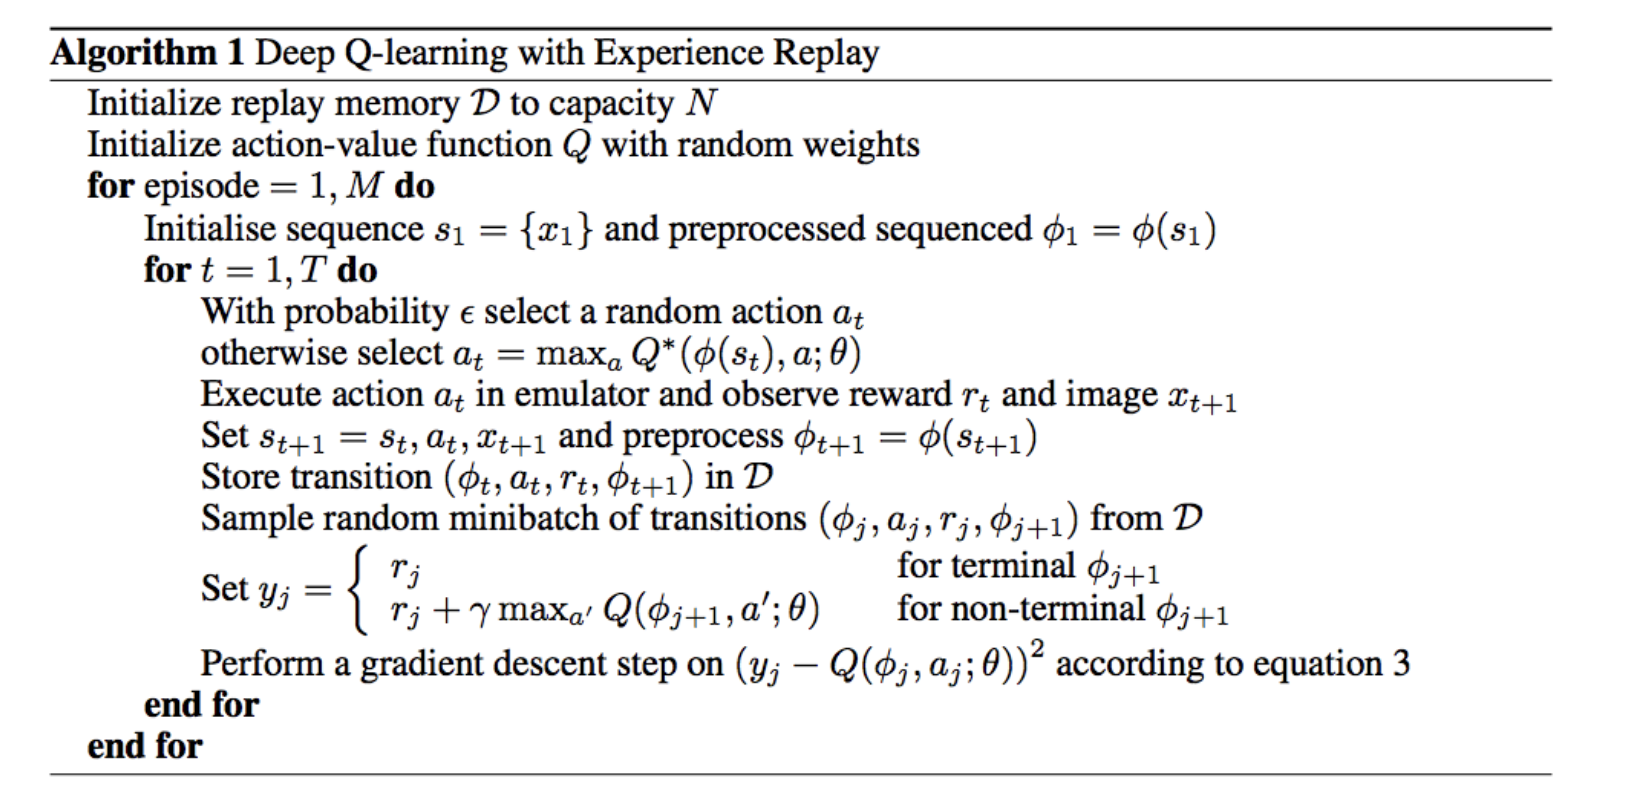

In [ ]:
from IPython import display
display.Image("images/dqn.png", width = 600, height = 300)

---
### 2.2. Ejemplo de DQN with keras-rl - CartPole

¿Quieres intentar estabilizar el péndulo invertido tu?
https://jeffjar.me/cartpole.html

Información del entorno:
https://www.gymlibrary.dev/environments/classic_control/cart_pole/

Basado en: https://github.com/keras-rl/keras-rl/blob/master/examples/dqn_cartpole.py

In [ ]:
import numpy as np
import gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [ ]:
ENV_NAME = 'CartPole-v0'

# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [ ]:
print("Numero de acciones disponibles:" + str(nb_actions))

Numero de acciones disponibles:2


In [ ]:
print("Formato de las observaciones:")
env.observation_space

Formato de las observaciones:


Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)

In [ ]:
# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 16)                80        
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 activation_1 (Activation)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 activation_2 (Activation)   (None, 16)                0

In [ ]:
# Let's define the memory for storing the experience
memory = SequentialMemory(limit=50000, window_length=1)

In [ ]:
# Define the policy that our agent will follow
policy = BoltzmannQPolicy()

In [ ]:
# Define the agent
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory,
               nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy)
dqn.compile(Adam(learning_rate=1e-3), metrics=['mae'])

In [ ]:
# Train the agent
dqn.fit(env, nb_steps=50000, visualize=False, verbose=2)

# After training is done, we save the final weights.
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

Training for 50000 steps ...


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.10/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


    20/50000: episode: 1, duration: 1.747s, episode steps:  20, steps per second:  11, episode reward: 20.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.300 [0.000, 1.000],  loss: 0.622430, mae: 0.651653, mean_q: 0.247159


/usr/local/lib/python3.10/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


    32/50000: episode: 2, duration: 0.349s, episode steps:  12, steps per second:  34, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.167 [0.000, 1.000],  loss: 0.476550, mae: 0.627863, mean_q: 0.618956
    55/50000: episode: 3, duration: 0.539s, episode steps:  23, steps per second:  43, episode reward: 23.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.478 [0.000, 1.000],  loss: 0.564150, mae: 0.642140, mean_q: 0.950647
    83/50000: episode: 4, duration: 0.566s, episode steps:  28, steps per second:  49, episode reward: 28.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.357 [0.000, 1.000],  loss: 0.559477, mae: 0.636825, mean_q: 0.973073
   111/50000: episode: 5, duration: 0.551s, episode steps:  28, steps per second:  51, episode reward: 28.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 0.347997, mae: 0.771664, mean_q: 1.260014
   147/50000: episode: 6, duration: 0.866s, episode steps:  36, step

In [ ]:
# Finally, evaluate our algorithm for 5 episodes.
dqn.load_weights('dqn_{}_weights.h5f'.format(ENV_NAME))
dqn.test(env, nb_episodes=10, visualize=False)


Testing for 10 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200


---
### 2.3. Ejemplo DQN con Keras-rl - Breakout

Información del entorno: https://www.gymlibrary.dev/environments/atari/breakout/

Basado en: https://github.com/Finspire13/pytorch-policy-gradient-example/blob/master/pg.py

In [ ]:
from __future__ import division

from PIL import Image
import numpy as np
import gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

In [ ]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

In [ ]:
# In this example, we need to preprocess the observations
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

In [ ]:
# Get the environment and extract the number of actions.
import gym
import numpy as np
env_name = 'BreakoutDeterministic-v4'
env = gym.make(env_name)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [ ]:
print("Numero de acciones disponibles: " + str(nb_actions))

Numero de acciones disponibles: 4


In [ ]:
print("Formato de las observaciones:")
env.observation_space

Formato de las observaciones:


Box(0, 255, (210, 160, 3), uint8)

In [ ]:
# Next, we build our model. We use the same model that was described by Mnih et al. (2015).
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
model = Sequential()
print(K.image_data_format())
if K.image_data_format() == 'channels_last':
    # (width, height, channels)
    model.add(Permute((2, 3, 1), input_shape=input_shape))
elif K.image_data_format() == 'channels_first':
    # (channels, width, height)
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

model.add(Convolution2D(32, (8, 8), strides=(4, 4)))
model.add(Activation('relu'))
model.add(Convolution2D(64, (4, 4), strides=(2, 2)))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3), strides=(1, 1)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

channels_last
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 84, 84, 4)         0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        8224      
                                                                 
 activation_4 (Activation)   (None, 20, 20, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 activation_5 (Activation)   (None, 9, 9, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 activation_6 (Activation)   (None, 7, 7

In [ ]:
memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)
processor = AtariProcessor()

In [ ]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1, value_test=.05,
                              nb_steps=1000000)

In [ ]:
dqn = DQNAgent(model=model, nb_actions=nb_actions, policy=policy,
               memory=memory, processor=processor,
               nb_steps_warmup=50000, gamma=.99,
               target_model_update=10000,
               train_interval=4)
dqn.compile(Adam(learning_rate=.00025), metrics=['mae'])

In [ ]:
# Training part
weights_filename = 'dqn_{}_weights.h5f'.format(env_name)
checkpoint_weights_filename = 'dqn_' + env_name + '_weights_{step}.h5f'
log_filename = 'dqn_{}_log.json'.format(env_name)
callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=250000)]
callbacks += [FileLogger(log_filename, interval=100)]

dqn.fit(env, callbacks=callbacks, nb_steps=1750000, log_interval=10000, visualize=False)

dqn.save_weights(weights_filename, overwrite=True)

Training for 1750000 steps ...
Interval 1 (0 steps performed)
   10/10000 [..............................] - ETA: 59s - reward: 0.0000e+00  

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 73s 7ms/step - reward: 0.0061
55 episodes - episode_reward: 1.091 [0.000, 6.000] - ale.lives: 2.930

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 75s 7ms/step - reward: 0.0065
56 episodes - episode_reward: 1.161 [0.000, 7.000] - ale.lives: 2.887

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 78s 8ms/step - reward: 0.0052
58 episodes - episode_reward: 0.914 [0.000, 3.000] - ale.lives: 2.979

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 73s 7ms/step - reward: 0.0062
56 episodes - episode_reward: 1.089 [0.000, 4.000] - ale.lives: 2.895

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 76s 8ms/step - reward: 0.0071
54 episodes - episode_reward: 1.296 [0.000, 5.000] - ale.lives: 2.950

Interval 6 (50000 steps performed)
 2733/10000 [=======>......................] - ETA: 8:00 - reward: 0.0051

In [ ]:
# Testing part
#weights_filename = 'dqn_{}_weights.h5f'.format(env_name)
weights_filename = "dqn_BreakoutDeterministic-v4_weights_1750000.h5f"
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

---